In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
import warnings
warnings.simplefilter(action='ignore')


In [20]:
df=pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [21]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [22]:
df.drop(columns=['Booking_ID'],inplace=True,axis=1)


In [23]:
df.shape

(29020, 18)

In [24]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

-  No null values in the data set.

In [25]:
df.duplicated().sum()

np.int64(7661)

- No of duplicated rows are 7661 out of 29020.

In [26]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
197,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.0,0,Canceled
216,2,0,0,3,Meal Plan 1,0,Room_Type 1,304,2018,11,3,Online,0,0,0,89.0,0,Canceled
249,2,0,1,4,Meal Plan 1,0,Room_Type 1,275,2018,10,5,Offline,0,0,0,90.0,0,Canceled
284,1,0,0,1,Meal Plan 1,0,Room_Type 1,99,2018,2,19,Corporate,0,0,0,81.0,0,Not_Canceled
310,1,0,0,2,Meal Plan 1,0,Room_Type 1,192,2018,6,24,Offline,0,0,0,95.0,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29010,2,0,0,5,Meal Plan 2,0,Room_Type 1,230,2018,9,6,Online,0,0,0,137.0,0,Canceled
29011,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.5,0,Canceled
29016,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.0,0,Canceled
29017,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.0,1,Not_Canceled


In [27]:
df.drop_duplicates(inplace=True)


In [28]:
df.shape

(21359, 18)

## identifying categorical variables


In [29]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [30]:
for col in df.columns:
    print(f"{col} value counts:")
    print(df[col].value_counts())
    print("\n")
    

no_of_adults value counts:
no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64


no_of_children value counts:
no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64


no_of_weekend_nights value counts:
no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64


no_of_week_nights value counts:
no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64


type_of_meal_plan value counts:
type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64


required_car_parking_space value counts:
required_car_parking_space
0    20452
1      907
Name: count, dtype: int64


room_type_reserved 

- our data is imbalanced

In [31]:
cat_col=['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type','repeated_guest','booking_status']
num_col=[]
for i in df.columns:
    if i not in cat_col:
        num_col.append(i)
    


In [32]:
num_col

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [33]:
for col in num_col:
    print(f"- {col}")
    

- no_of_adults
- no_of_children
- no_of_weekend_nights
- no_of_week_nights
- lead_time
- arrival_year
- arrival_month
- arrival_date
- no_of_previous_cancellations
- no_of_previous_bookings_not_canceled
- avg_price_per_room
- no_of_special_requests


## Data Analysis

In [34]:
data=df.copy()

In [35]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


## UNIVARIATE ANALYSIS


- Univariate analysis of all numerical columns through histogram and box plot. 

In [36]:
def num_plot_dist(df,num_features):
    fig,axes=plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    for i,feature in enumerate(num_features):
        sns.histplot(data=df,x=feature,ax=axes[i][0],kde=True,palette='Blues')
        axes[i][0].set_title(f'Histogram of {feature}')
        sns.boxplot(data=df,x=feature,ax=axes[i][1],palette='Blues')
        axes[i][1].set_title(f'boxplot of  {feature}')
    plt.tight_layout()
    plt.show()



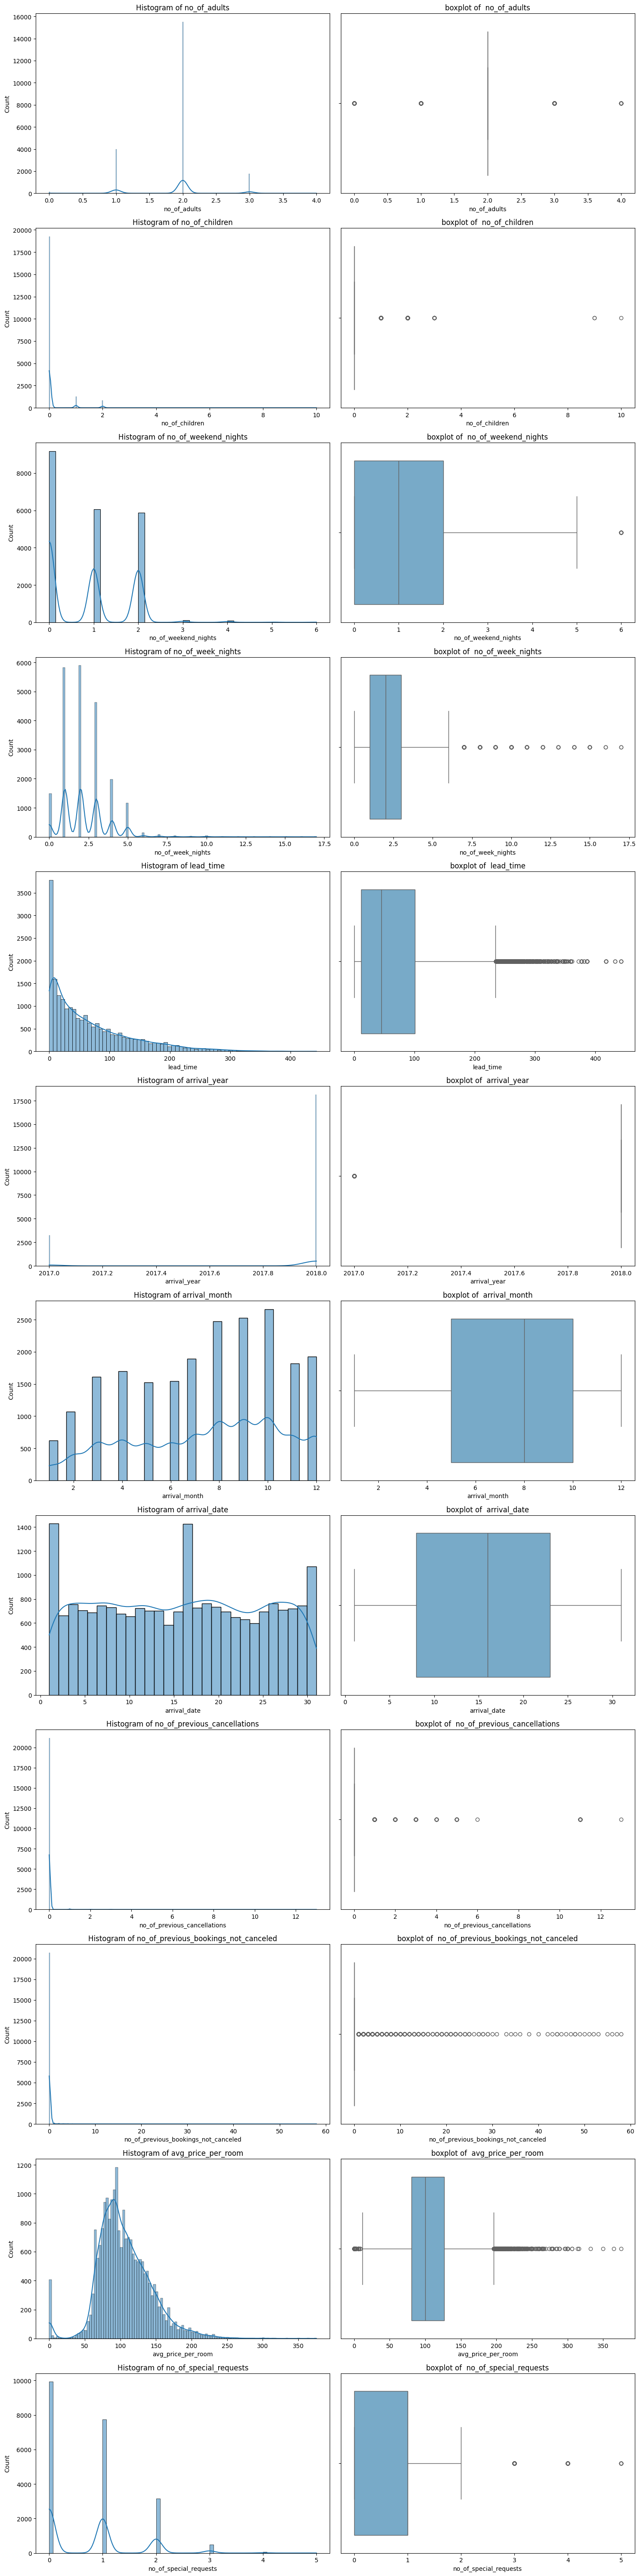

In [37]:
num_plot_dist(data,num_col)

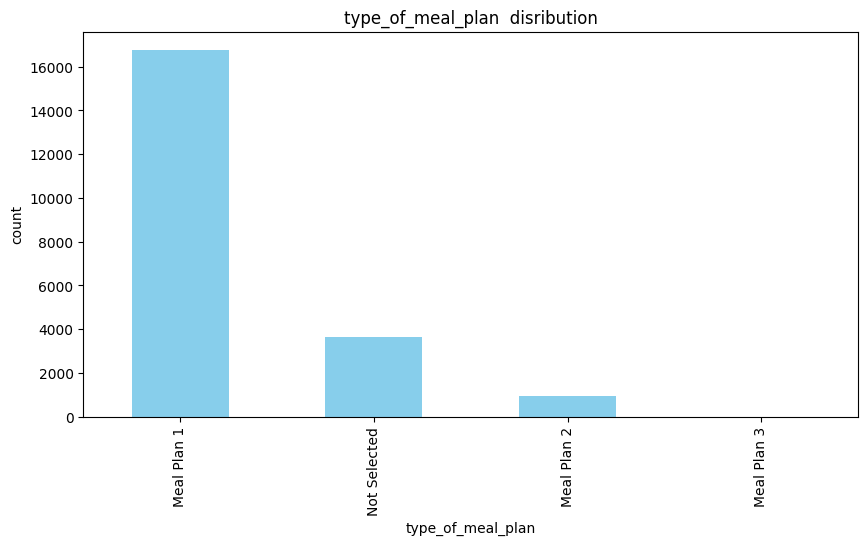

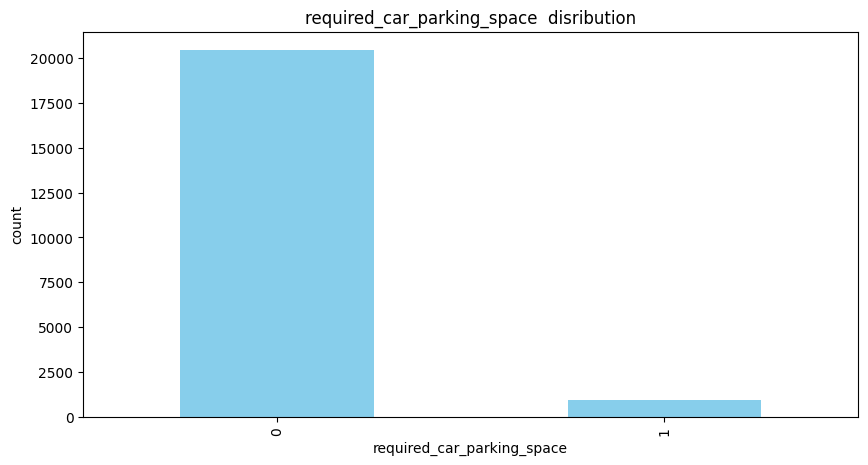

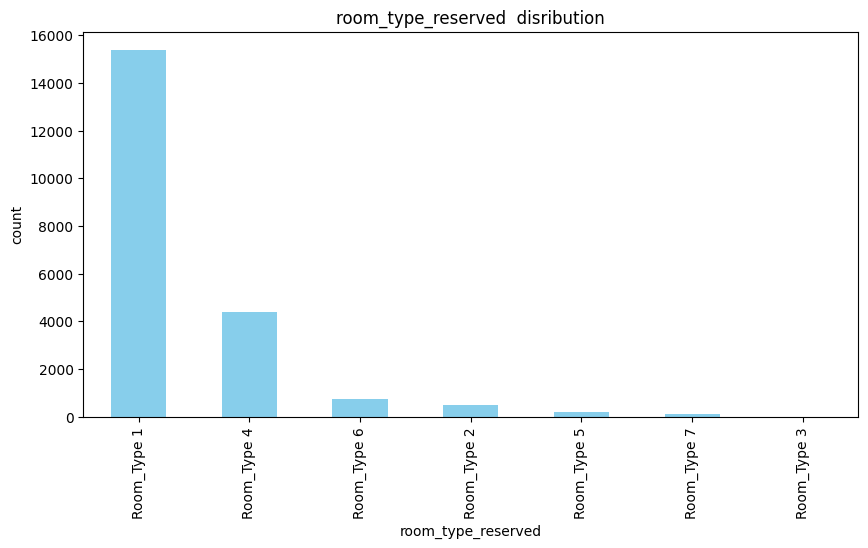

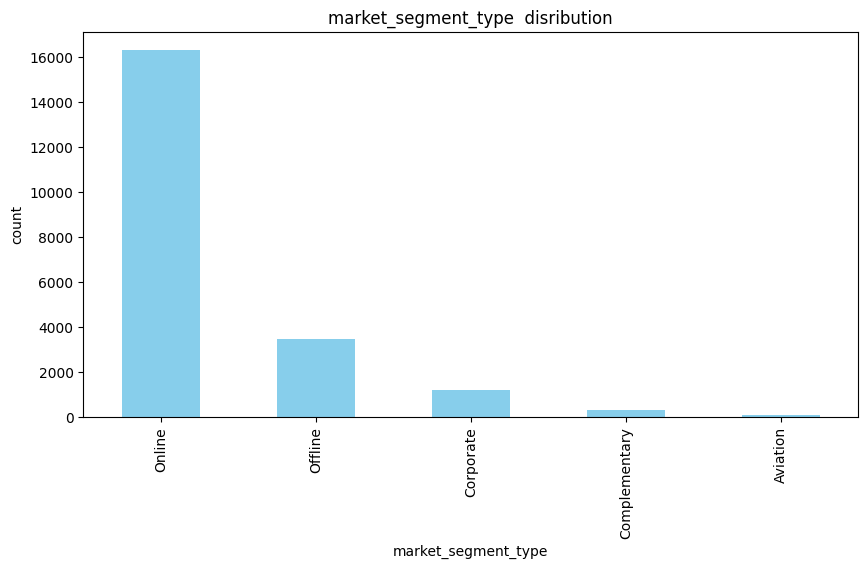

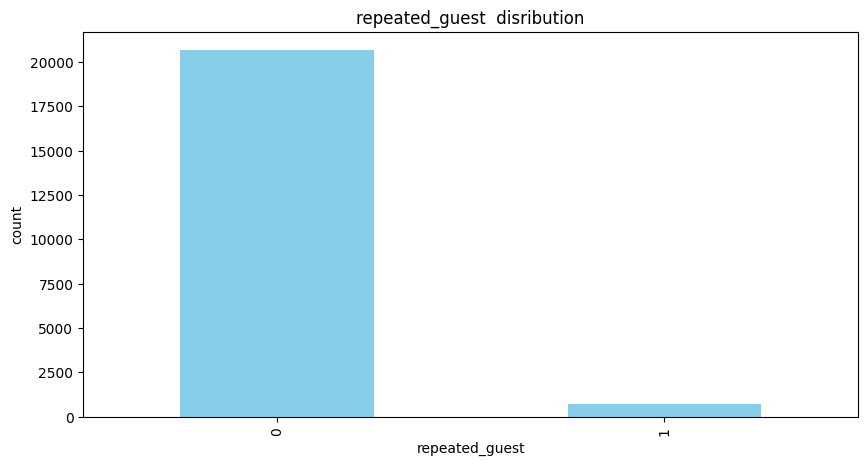

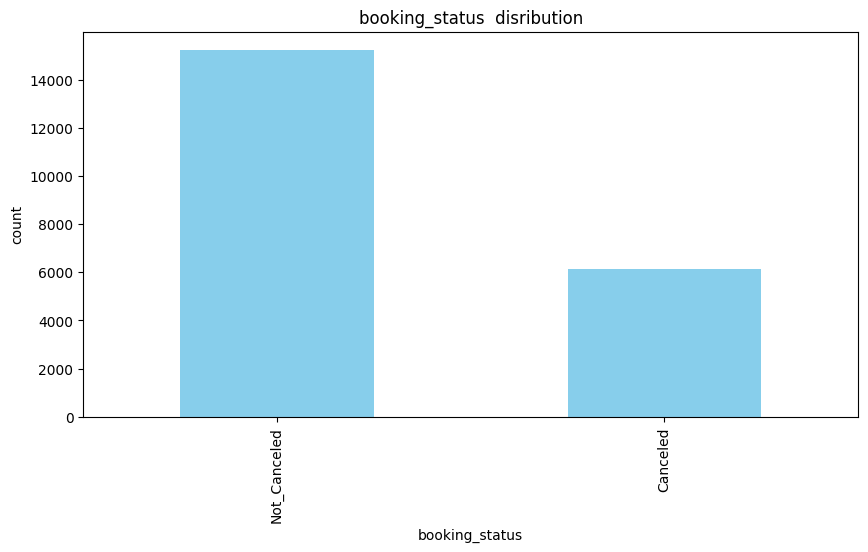

In [38]:
for col in cat_col:
    plt.figure(figsize=(10,5))
    data[col].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f'{col}  disribution')
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

## BIVARIATE ANALYSIS

In [39]:
def plot_bivariate_num(df, target, num_features):
    num_plot = len(num_features)
    num_rows = (num_plot + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()
    
    for i, feature in enumerate(num_features):
        sns.boxplot(x=target, y=feature, data=df, ax=axes[i], palette='Blues')
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(feature)
    
    # Hide empty subplots if any
    for i in range(len(num_features), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

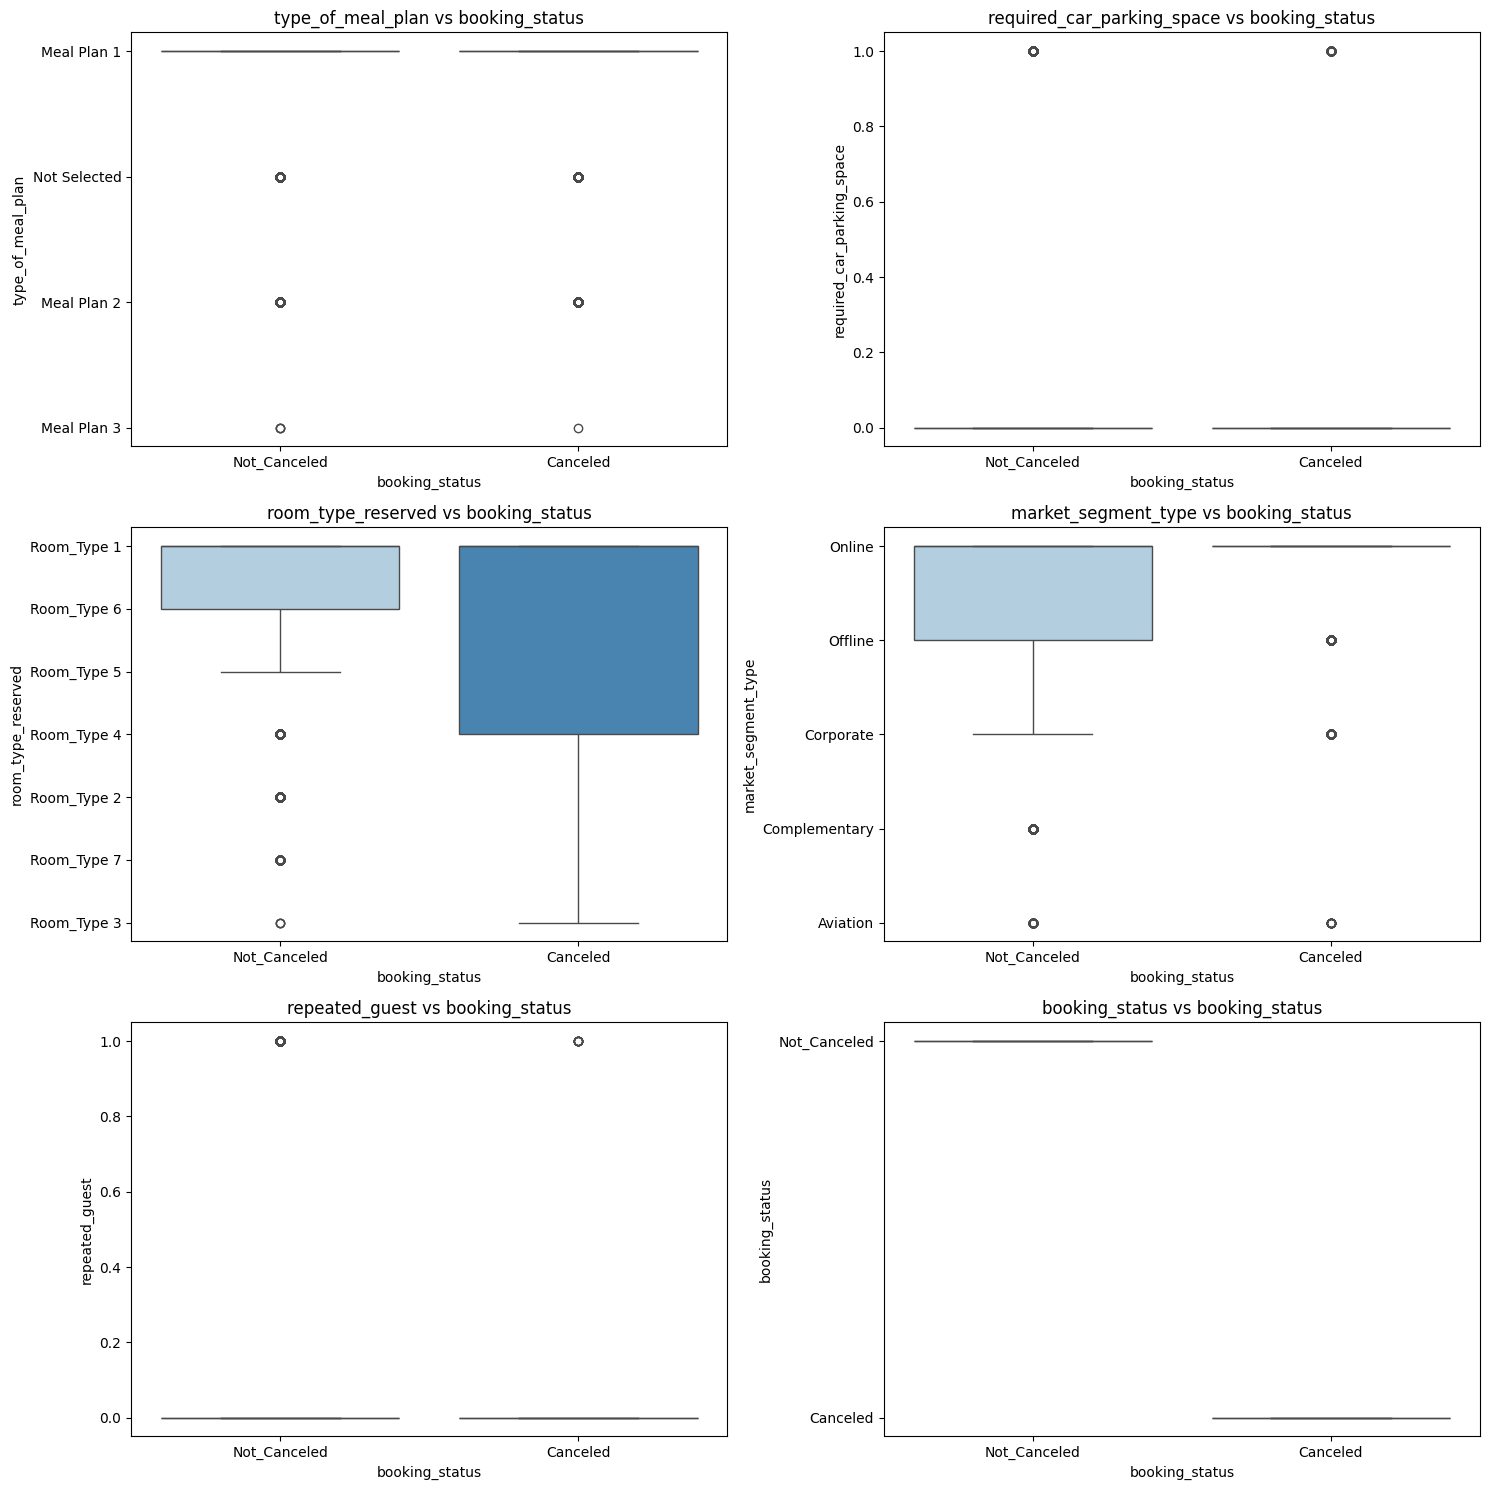

In [40]:
plot_bivariate_num(data,'booking_status',cat_col)

- birvariate analysis of categorical features.

In [41]:
def plot_bivariate_cat(df,target,cat_features):
    num_features=len(cat_features)
    num_rows=(num_features+1)//2
    fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
    
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature,hue=target,data=df,ax=axes[i],palette="Set2")
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].tick_params(axis='x',rotation=90)
        
    plt.tight_layout()
    plt.show()



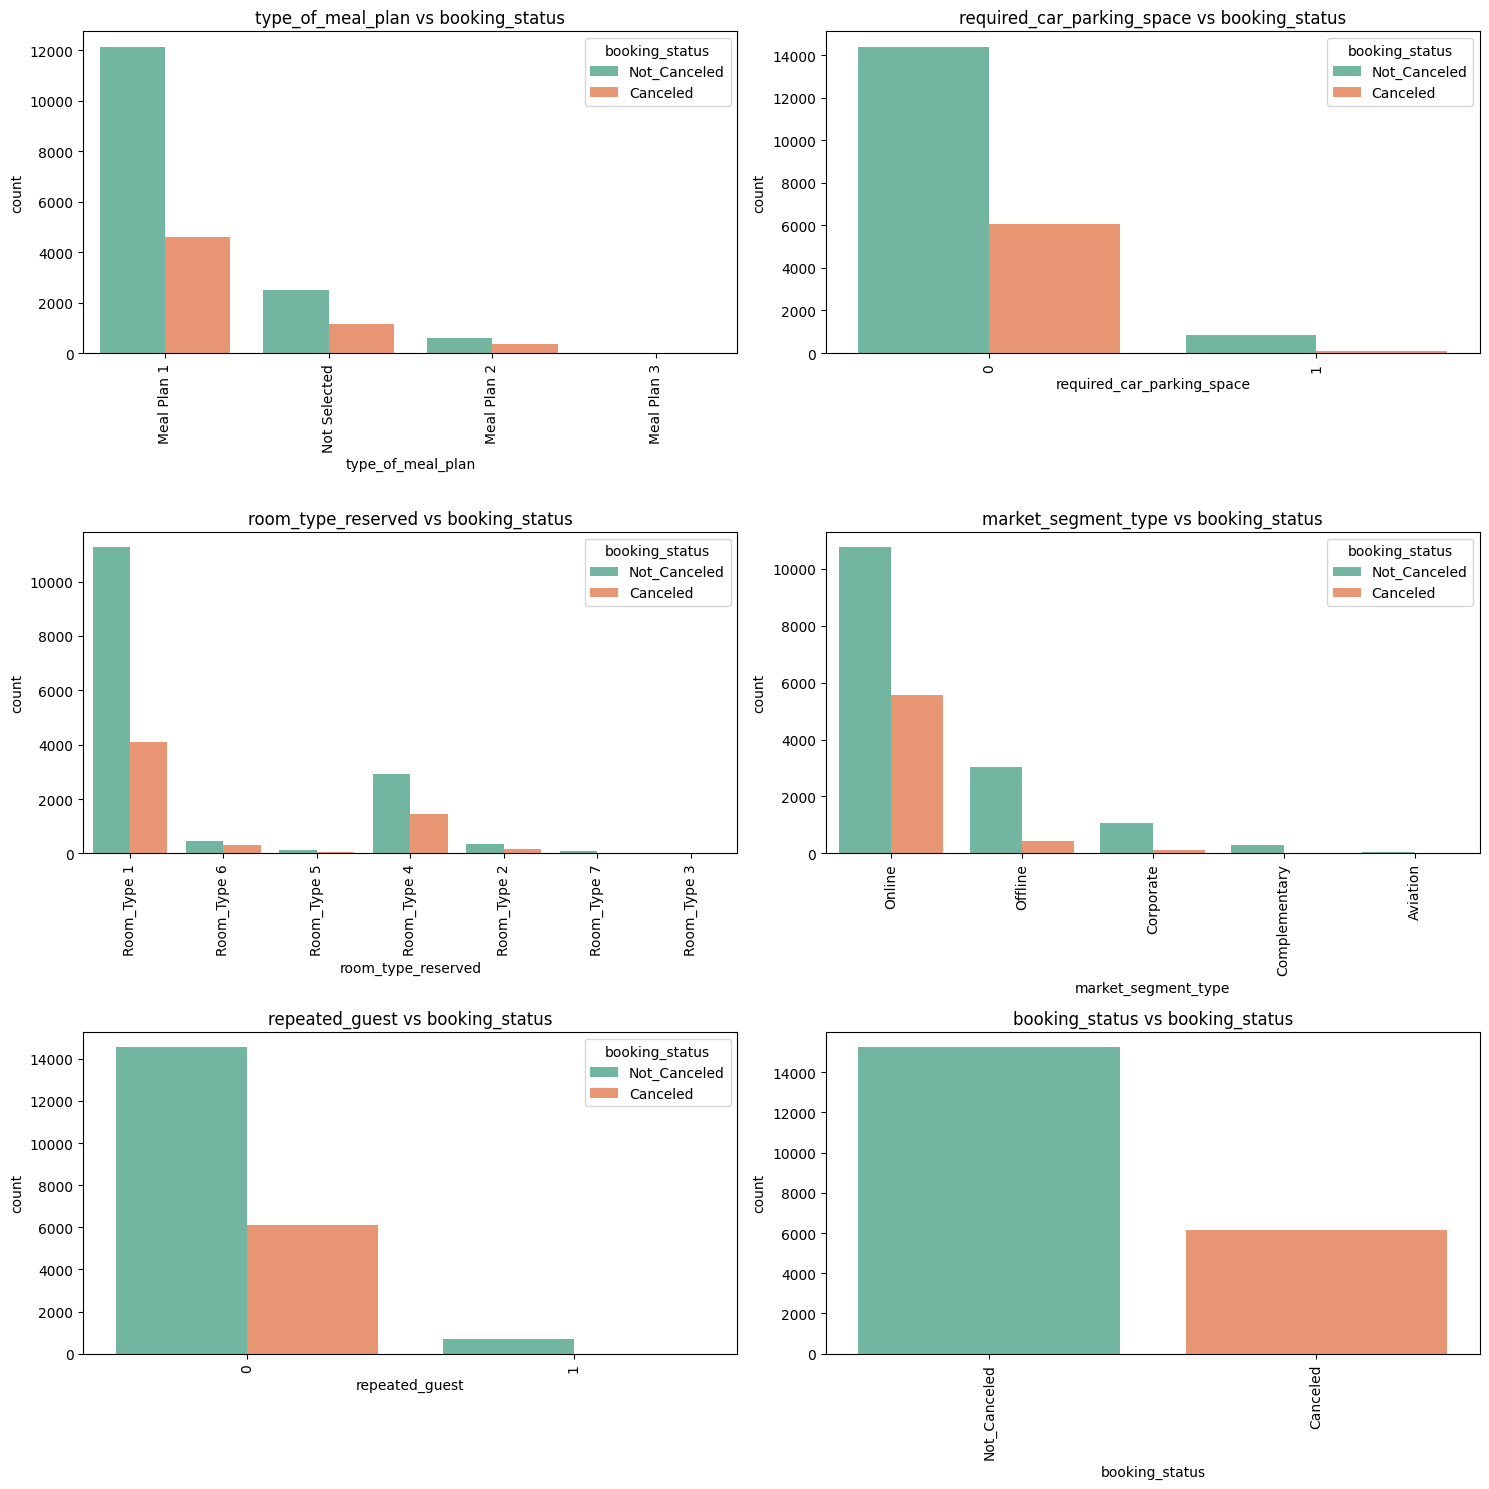

In [42]:
plot_bivariate_cat(data,'booking_status',cat_col)

## Data Processing


In [43]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [52]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

#### label encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder=LabelEncoder()
mappings={}
for col in cat_col:
    df[col]=label_encoder.fit_transform(df[col])
    mappings[col]={label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}

In [55]:
mappings


{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Checking for multicolinearity

In [31]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [33]:
X=add_constant(df)
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [34]:
vif_data

,feature,vif
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


### our data dont have any multicollinearity issue as all the vif values are less than 5

In [35]:
corr=df.corr()

In [36]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

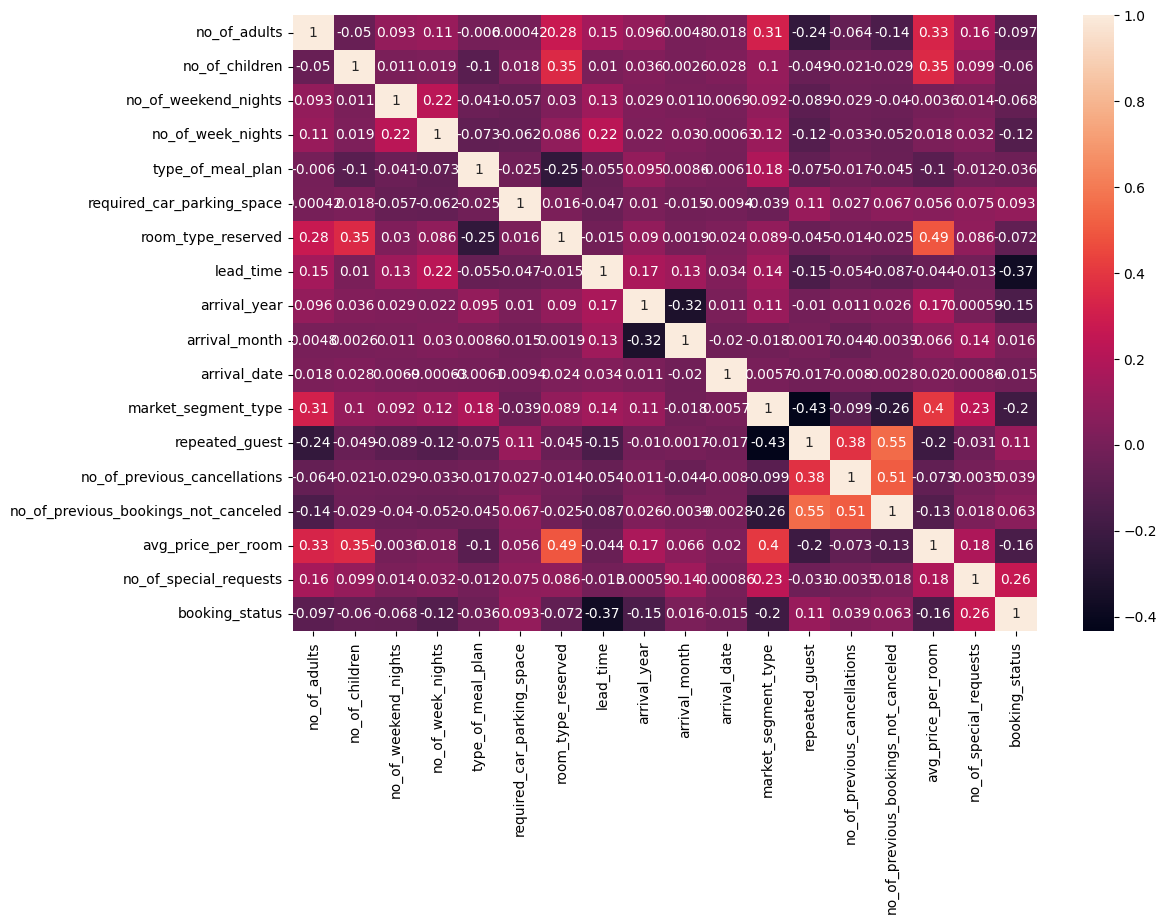

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

- Lead time has a negative correlation with booking status, which indicates that as lead time increases, the number of chances of cancellation of booking status increases. 

### skewness

In [38]:
skewness=df.skew()

In [39]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [40]:
for col in df.columns:
    if skewness[col]> 5:
        df[col]=np.log1p(df[col])


#### Handling Imbalanced data

In [41]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [42]:
X=df.drop(columns=['booking_status'],axis=1)
y=df['booking_status']


In [43]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [44]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
pip install --upgrade scikit-learn imbalanced-learn

  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)

In [48]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [49]:
balanced_df=pd.DataFrame(X_res,columns=X.columns)
balanced_df['booking_status']=y_res

In [50]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [51]:
balanced_df.shape

(30462, 18)

In [52]:
df=balanced_df.copy()

In [53]:
df.shape

(30462, 18)

### feature selection

In [54]:
print(len(df.columns))

18


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
X=df.drop(columns=['booking_status'],axis=1)
y=df['booking_status']

In [57]:
model=RandomForestClassifier(random_state=42)

In [59]:
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [61]:
feature_importance=model.feature_importances_

In [62]:
feature_importance_df=pd.DataFrame({
    'Feature':X.columns,
    'Importance':feature_importance
})

In [68]:
sorted_features=feature_importance_df.sort_values(by='Importance',ascending=False)


In [69]:
top_10_features=sorted_features['Feature'].head(10).values
top_10_features

array(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved'], dtype=object)

In [77]:
top_10_df=df[list(top_10_features)+['booking_status']]
top_10_df.head()


,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [79]:
len(top_10_df.columns)

11

In [80]:
df=top_10_df.copy()

## model selection

In [81]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 3.2 MB/s eta 0:00:47
   ---------------------------------------- 0.5/150.0 MB 7.8 MB/s eta 0:00:20
   ---------------------------------------- 0.8/150.0 MB 7.4 MB/s eta 0:00:21
   ---------------------------------------- 1.0/150.0 MB 6.4 MB/s eta 0:00:24
   ---------------------------------------- 1.2/150.0 MB 5.8 MB/s eta 0:00:26
   ---------------------------------------- 1.4/150.0 MB 5.4 MB/s eta 0:00:28
   ---------------------------------------- 1.6/150.0 MB 5.2 MB/s eta 0:00:29
   ---------------------------------------- 1.7/150.0 MB 5.0 MB/s eta 0:00:30
    --------------------------------------- 1.9/150.0 MB 4.8 MB/s eta 0:00:31
    --------------------------------------- 2.1/150.0 MB 4.7 MB/s eta 0:00:32
    --------------------------------------- 2.3/150.0 MB 4.7 MB/s eta 0:00:32
    --------------------------------------- 2.5/150.0 MB 4.6 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [83]:
X=df.drop(columns=['booking_status'],axis=1)
y=df['booking_status']

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
classifiers={
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "LogesticRegression":LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "support vector machine":SVC(random_state=42),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XG boost": XGBClassifier(random_state=42),
    "Ada Boost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}

In [88]:
metrics={
    "Model":[],
    "Accuracy":[],
    "Precision":[],
    "Recall_score":[],
    "F1_score":[]
}

In [90]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred=classifier.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    metrics["Model"].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall_score'].append(recall)
    metrics['F1_score'].append(f1)
    

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [92]:
metrics_df=pd.DataFrame(metrics)

In [93]:
metrics_df

,Model,Accuracy,Precision,Recall_score,F1_score
0,RandomForestClassifier,0.891679,0.892508,0.892508,0.892508
1,LogesticRegression,0.774331,0.802787,0.731922,0.765718
2,Gradient Boosting,0.837190,0.821473,0.864821,0.842590
3,support vector machine,0.720335,0.729657,0.706840,0.718068
4,Decision Tree,0.840801,0.850000,0.830619,0.840198
5,KNN,0.779419,0.856612,0.675244,0.755191
6,Naive Bayes,0.773346,0.803232,0.728664,0.764133
7,XG boost,0.870343,0.866324,0.878176,0.872210
8,Ada Boost,0.804202,0.821294,0.781433,0.800868
9,LGBM,0.866732,0.851494,0.890879,0.870742


### Random Forest model training

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [100]:
X=df.drop(columns=['booking_status'],axis=1)
y=df['booking_status']

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
rf=RandomForestClassifier(random_state=42)

#### hyperparameter tuning

In [108]:
param_grid={
    'n_estimators':randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,5),
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True,False]
}

In [110]:
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [111]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.4s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F0E89146D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F0E8914490>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F0E89156D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F0E34E3DD0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [112]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 408}

In [113]:
best_rf_model=random_search.best_estimator_


In [114]:
best_rf_model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False, max_depth=33, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=408, random_state=42)

In [117]:
y_pred=best_rf_model.predict(X_test)

In [118]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [119]:
accuracy

0.8921713441654358

In [120]:
precision

0.8893191352049048

In [121]:
recall

0.8977198697068404

In [122]:
f1

0.8934997568487599

### save the model

In [123]:
import joblib


In [125]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [126]:
loaded_model=joblib.load("random_forest.pkl")

In [130]:
X_train[0:1].values

array([[190. ,   1. ,  93.5,   9. ,   8. ,   4. ,   5. ,   2. ,   0. ,
          0. ]])

In [131]:
new_data=X_train[0:1].values

In [132]:
loaded_model.predict(new_data)

array([1])